In [40]:
# utilities
import re
import numpy as np
import pandas as pd
import string
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [41]:
df = pd.read_csv('train.csv')
df.sample(5)

,Unnamed: 0,id,text,sentiment
16417,21050,802364594299801000,i just liked ‚äúthe freewheelin' music docume...,positive
2624,3343,641013183562555000,murray has this. he may not have it at the mo...,positive
20849,26662,676992408878493000,saudi arabia women voted in municipal election...,positive
3240,4141,636440803355721000,i'm including 20th &amp; 21st because no one ...,neutral
7318,9335,676729300268146000,classic tuesday with rusty: zelda - twilight ...,positive


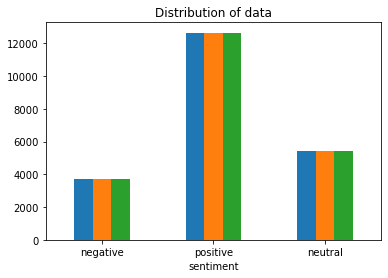

In [42]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['negative','positive', 'neutral'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

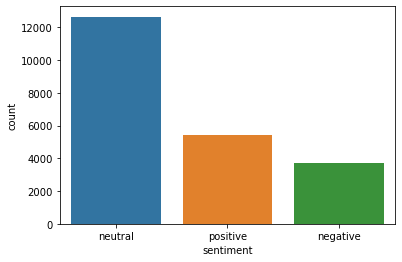

In [43]:
sns.countplot(x='sentiment', data=df)

In [44]:
dataset=df[['text','sentiment']]
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/1056863832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']=dataset['text'].str.lower()


21797    @hrtablaze the beginning of a dictatorship is ...
21798         son idc anymore. i'm going by shawn tomorrow
21799    but remember the clinton foundation?? https://...
21800    press: "r u worried murray dominated his 3rd r...
21801    @rinashah i have been using moto g 2nd gen for...
Name: text, dtype: object

In [45]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
              'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [46]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/2350654528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))


0    doctors hit campaign trail race medical counci...
1    anybody going radio station tomorrow see shawn...
2            found naruto didn't become 5th hokage....
3    "prince george reservist died saturday wanted ...
4    season sun versi nirvana rancak gak..slow rock...
Name: text, dtype: object

In [47]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/2090216121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))


21797    hrtablaze beginning dictatorship gun control e...
21798              son idc anymore im going shawn tomorrow
21799    but remember clinton foundation httpstcobmrlug...
21800    press r u worried murray dominated 3rd round d...
21801    rinashah using moto g 2nd gen over month its a...
Name: text, dtype: object

In [48]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/3406252243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))


21797    hrtablaze beginning dictatorship gun control e...
21798              son idc anymore im going shawn tomorrow
21799    but remember clinton foundation httpstcobmrlug...
21800    press r u worried murray dominated 3rd round d...
21801    rinashah using moto g 2nd gen over month its a...
Name: text, dtype: object

In [49]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/3866510342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))


21797    hrtablaze beginning dictatorship gun control e...
21798              son idc anymore im going shawn tomorrow
21799    but remember clinton foundation httpstcobmrlug...
21800    press r u worried murray dominated 3rd round d...
21801    rinashah using moto g 2nd gen over month its a...
Name: text, dtype: object

In [50]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/765168537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))


21797    hrtablaze beginning dictatorship gun control e...
21798              son idc anymore im going shawn tomorrow
21799    but remember clinton foundation httpstcobmrlug...
21800    press r u worried murray dominated rd round dj...
21801    rinashah using moto g nd gen over month its ab...
Name: text, dtype: object

In [51]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/2867528544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(tokenizer.tokenize)


0    [doctors, hit, campaign, trail, race, medical,...
1    [anybody, going, radio, station, tomorrow, see...
2           [found, naruto, didnt, become, th, hokage]
3    [prince, george, reservist, died, saturday, wa...
4    [season, sun, versi, nirvana, rancak, gakslow,...
Name: text, dtype: object

In [52]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/2435083232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))


0    [doctors, hit, campaign, trail, race, medical,...
1    [anybody, going, radio, station, tomorrow, see...
2           [found, naruto, didnt, become, th, hokage]
3    [prince, george, reservist, died, saturday, wa...
4    [season, sun, versi, nirvana, rancak, gakslow,...
Name: text, dtype: object

In [53]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

C:\Users\Quang\AppData\Local\Temp/ipykernel_19920/3427262975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))


0    [doctors, hit, campaign, trail, race, medical,...
1    [anybody, going, radio, station, tomorrow, see...
2           [found, naruto, didnt, become, th, hokage]
3    [prince, george, reservist, died, saturday, wa...
4    [season, sun, versi, nirvana, rancak, gakslow,...
Name: text, dtype: object

In [54]:
X = [' '.join(item) for item in dataset.text]
y=dataset.sentiment

In [63]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)


In [56]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  217380


In [57]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [58]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [59]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       183
     neutral       0.56      1.00      0.72       609
    positive       0.00      0.00      0.00       299

    accuracy                           0.56      1091
   macro avg       0.19      0.33      0.24      1091
weighted avg       0.31      0.56      0.40      1091



c:\Users\Quang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Quang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Quang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

    negative       0.53      0.40      0.46       183
     neutral       0.67      0.76      0.71       609
    positive       0.62      0.54      0.58       299

    accuracy                           0.64      1091
   macro avg       0.61      0.57      0.58      1091
weighted avg       0.63      0.64      0.63      1091



In [61]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

    negative       0.58      0.38      0.46       183
     neutral       0.67      0.80      0.73       609
    positive       0.64      0.52      0.57       299

    accuracy                           0.65      1091
   macro avg       0.63      0.57      0.59      1091
weighted avg       0.65      0.65      0.64      1091



In [62]:
dataset = pd.read_csv('Test.csv', )
dataset['text']=dataset['text'].str.lower()
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()
english_punctuations = string.punctuation
punctuations_list = english_punctuations
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
def join_list(str):
    return ' '.join(str)
dataset['text'] = dataset['text'].apply(lambda x: join_list(x))

X_real_test_id = dataset.id
X_real_test_raw = dataset.text
X_real_test_v  = vectoriser.transform(X_real_test_raw)
y_pred4 = LRmodel.predict(X_real_test_v)

n = 0
p = 0
ne = 0

for i in y_pred4:
    if i == 'neutral':
        n +=1
    elif i == 'positive':
        p +=1
    elif i == 'negative':
        ne +=1

data = {'id':X_real_test_id,'text':X_real_test_raw,'sentiment':y_pred4}
predictions = pd.DataFrame(data=data)
(predictions.drop(['text'], axis=1)).to_csv('lrmodel.csv', index=False)